In [12]:
# Only useful if you want to work in google colab
from google.colab import drive
import os

# This will prompt for authorization.
drive.mount('drive', force_remount=True)

Mounted at drive


In [1]:
# change it if your working on google colab
persistent_storage = 'images'


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image

from PIL import Image

In [3]:
from update_progress import update_progress
from noise import add_noise
from shannon import ground_truth_error
from statistics import sigma_prime_cal, sigma_cal, phi
from upper_bound import upper_bound, enveloppe_cal

0.20983264399509802
0.4615151807206402 1.2236881375157307
Percent: [##########] 99.23% 

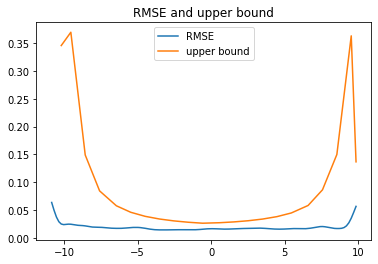

In [4]:
image = Image.open(persistent_storage +  '/nimes.pgm').convert('L')
X_gd = np.asarray(image)
X_gd = X_gd/np.max(X_gd)
n,  m = X_gd.shape
X_h = X_gd[:, m-216:m-196]
shift = m-236
M = n
RMSE = []
set_upper_bound = []
shift_h = 10
mu = np.mean(X_h)
print(mu)
d = 130
range_t = np.linspace(-shift_h-1, shift_h, d)
i = 0

phi_l = phi(X_h)
sigma_prime = sigma_prime_cal(phi_l, 0.5)
sigma = sigma_cal(phi_l, sigma_prime)

print(sigma_prime, sigma)


for t in range_t:

    update_progress(i/d)

    error = ground_truth_error(X_gd, X_h, t)
    RMSE.append(error)
    set_upper_bound.append(upper_bound(t, mu, shift_h, sigma, sigma_prime))
    i += 1

env = enveloppe_cal(set_upper_bound[5:d-1], range_t[5:d-1])

plt.plot(range_t[1:d-1], RMSE[1:d-1], label="RMSE")
plt.plot(range_t[5:d-1], env, label="upper bound")
plt.legend()
plt.title("RMSE and upper bound")
plt.show()




In [6]:
# noisy picture :
image = Image.open(persistent_storage +  '/nimes.pgm').convert('L')

sigma_range = [1, 8, 15, 29]
X_gd = np.asarray(image)
n, m = X_gd.shape

UPPER_bounds = []
RMSE_set = []

for sigma in sigma_range:
    print('sigma = ', sigma)
    noisy_test = add_noise(n,m,sigma)
    X_gd_noisy = X_gd + noisy_test

    X_gd_noisy = X_gd_noisy/np.max(X_gd_noisy)
    n,  m = X_gd_noisy.shape
    X_h = X_gd_noisy[:, m-216:m-196]
    M = n
    RMSE = []
    set_upper_bound = []
    shift_h = 20
    mu = np.mean(X_h)
    d = 130
    range_t = np.linspace(-shift_h-1, shift_h, d)
    i = 0

    phi_l = phi(X_h)
    sigma_prime = sigma_prime_cal(phi_l, 0.5)
    sigma = sigma_cal(phi_l, sigma_prime)

    for t in range_t:

        update_progress(i/d)

        error = ground_truth_error(X_gd_noisy, X_h, t)
        RMSE.append(error)
        set_upper_bound.append(upper_bound(t, mu, shift_h, sigma, sigma_prime))
        i += 1

    env = enveloppe_cal(set_upper_bound[5:d-1], range_t[5:d-1])
    UPPER_bounds.append(env)
    RMSE_set.append(RMSE[1:d-1])

sigma =  1
Percent: [##########] 99.23% sigma =  8
Percent: [##########] 99.23% sigma =  15
Percent: [##########] 99.23% sigma =  29
Percent: [##########] 99.23% 

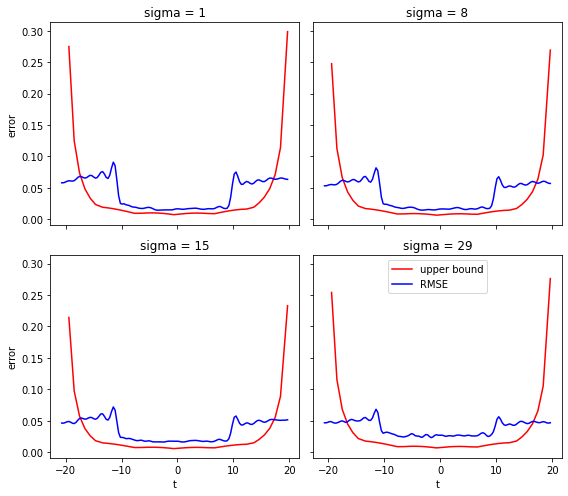

In [7]:
f, axs = plt.subplots(2,2, sharex=True, sharey=True, figsize=[8, 7])
axs[0,0].plot(range_t[5:d-1], UPPER_bounds[0], color = 'r', label="upper bound")
axs[0,1].plot(range_t[5:d-1], UPPER_bounds[1], color = 'r', label="upper bound")
axs[1,0].plot(range_t[5:d-1], UPPER_bounds[2], color = 'r', label="upper bound")
axs[1,1].plot(range_t[5:d-1], UPPER_bounds[3], color = 'r', label="upper bound")

axs[0,0].plot(range_t[1:d-1], RMSE_set[0], color = 'b', label="RMSE")
axs[0,1].plot(range_t[1:d-1], RMSE_set[1], color = 'b', label="RMSE")
axs[1,0].plot(range_t[1:d-1], RMSE_set[2], color = 'b', label="RMSE")
axs[1,1].plot(range_t[1:d-1], RMSE_set[3], color = 'b', label="RMSE")

axs[0, 0].set_title('sigma = 1')
axs[0, 1].set_title('sigma = 8')
axs[1, 0].set_title('sigma = 15')
axs[1, 1].set_title('sigma = 29')

for ax in axs.flat:
    ax.set(xlabel='t', ylabel='error')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
f.tight_layout()
plt.legend()
plt.show()